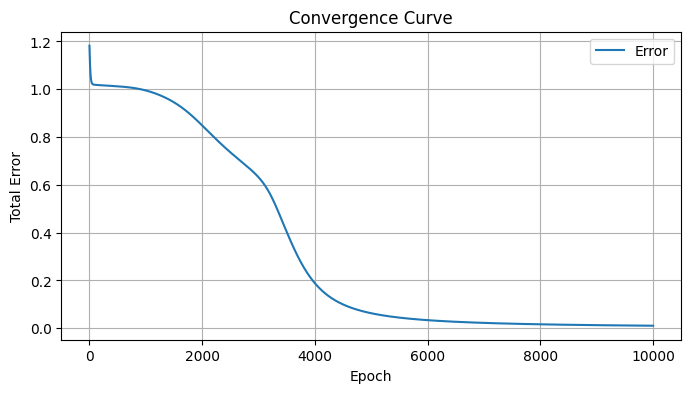

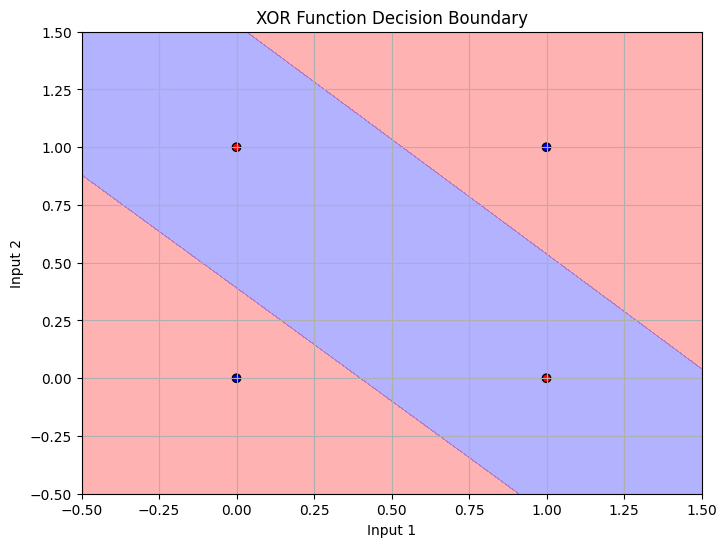

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR input and target
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
targets = np.array([[0],
                    [1],
                    [1],
                    [0]])

# Neural network parameters
input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1
learning_rate = 0.1
max_epochs = 10000

# Initialize weights and biases
np.random.seed(42)
weights_input_hidden = np.random.randn(input_layer_size, hidden_layer_size)
bias_hidden = np.random.randn(hidden_layer_size)
weights_hidden_output = np.random.randn(hidden_layer_size, output_layer_size)
bias_output = np.random.randn(output_layer_size)

convergence_curve = []

# Training the neural network
for epoch in range(max_epochs):
    total_error = 0

    for i in range(len(inputs)):
        # Forward pass
        input_layer = inputs[i]
        hidden_input = np.dot(input_layer, weights_input_hidden) + bias_hidden
        hidden_output = sigmoid(hidden_input)

        final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
        final_output = sigmoid(final_input)

        # Error
        error = targets[i] - final_output
        total_error += np.sum(error ** 2)

        # Backpropagation
        output_delta = error * sigmoid_derivative(final_output)
        hidden_delta = sigmoid_derivative(hidden_output) * np.dot(weights_hidden_output, output_delta)

        # Update weights and biases
        weights_hidden_output += learning_rate * hidden_output[:, np.newaxis] * output_delta
        bias_output += learning_rate * output_delta

        weights_input_hidden += learning_rate * input_layer[:, np.newaxis] * hidden_delta
        bias_hidden += learning_rate * hidden_delta

    convergence_curve.append(total_error)

    if total_error < 0.01:
        print("Converged in {} epochs.".format(epoch + 1))
        break

# Plot convergence curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(convergence_curve) + 1), convergence_curve, label='Error')
plt.xlabel('Epoch')
plt.ylabel('Total Error')
plt.title('Convergence Curve')
plt.grid(True)
plt.legend()
plt.show()

# Function to predict the output (for decision boundary)
def predict(x1, x2):
    input_grid = np.array([x1, x2]).T
    hidden_input = np.dot(input_grid, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)
    return final_output.reshape(x1.shape)

# Create a grid of points to plot decision boundaries
x1 = np.linspace(-0.5, 1.5, 200)
x2 = np.linspace(-0.5, 1.5, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = predict(X1.ravel(), X2.ravel())
Z = Z.reshape(X1.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, levels=[0, 0.5, 1], colors=['red', 'blue'], alpha=0.3)
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets.flatten(), cmap='bwr', edgecolors='k')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Function Decision Boundary')
plt.grid(True)
plt.show()
